# DSI Instructor Task: Part 1

### Load Packages

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE

## Python Coding and Data Set

### Loading the Data

In [2]:
# Open and read text file
with open("./field_names.txt",'r') as f:
    header = f.read().split('\n')
    print(header)

['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']


In [3]:
# Open the csv file
df=pd.read_csv("./breast-cancer.csv")
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
# Assign the header to the dataframe
df.columns = header
df.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
# What does the dataframe is made of - there is no null value - that's great
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          568 non-null    int64  
 1   diagnosis                   568 non-null    object 
 2   radius_mean                 568 non-null    float64
 3   radius_sd_error             568 non-null    float64
 4   radius_worst                568 non-null    float64
 5   texture_mean                568 non-null    float64
 6   texture_sd_error            568 non-null    float64
 7   texture_worst               568 non-null    float64
 8   perimeter_mean              568 non-null    float64
 9   perimeter_sd_error          568 non-null    float64
 10  perimeter_worst             568 non-null    float64
 11  area_mean                   568 non-null    float64
 12  area_sd_error               568 non-null    float64
 13  area_worst                  568 non

In [6]:
# Some descriptive statistics
df.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Number of unique value
df.nunique()

ID                            568
diagnosis                       2
radius_mean                   456
radius_sd_error               478
radius_worst                  521
texture_mean                  538
texture_sd_error              473
texture_worst                 536
perimeter_mean                536
perimeter_sd_error            542
perimeter_worst               431
area_mean                     498
area_sd_error                 539
area_worst                    518
smoothness_mean               532
smoothness_sd_error           527
smoothness_worst              547
compactness_mean              540
compactness_sd_error          532
compactness_worst             506
concavity_mean                497
concavity_sd_error            544
concavity_worst               456
concave_points_mean           510
concave_points_sd_error       514
concave_points_worst          543
symmetry_mean                 410
symmetry_sd_error             528
symmetry_worst                538
fractal_dimens

### Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [8]:
# What is the proportion of Benigh vs Maliagnant in the data
df.diagnosis.value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

In [9]:
# We separate the data into two, benign and malignat to see there respective caracteristics
benign = df.loc[df.diagnosis == "B"]
malignant = df.loc[df.diagnosis == "M"]

In [10]:
benign.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [11]:
malignant.describe()

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,...,211.000000,211.000000,211.00000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,3.698855e+07,17.460332,21.658104,115.330142,978.269194,0.102825,0.144560,0.160114,0.087710,0.192677,...,21.114692,29.375024,141.16545,1419.458294,0.144763,0.373446,0.449367,0.181843,0.322820,0.091400
std,1.382021e+08,3.211384,3.708042,21.900590,368.809660,0.012593,0.053335,0.074578,0.034212,0.027496,...,4.283704,5.384249,29.37531,597.966989,0.021889,0.169589,0.181038,0.046060,0.074264,0.021521
min,8.670000e+03,10.950000,11.890000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.10000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,8.619135e+05,15.070000,19.355000,98.710000,705.000000,0.094010,0.109400,0.109350,0.064620,0.174000,...,17.730000,25.820000,119.25000,969.200000,0.130350,0.244450,0.325650,0.152700,0.276200,0.076285
50%,8.956330e+05,17.300000,21.460000,114.200000,930.900000,0.102000,0.131900,0.150800,0.086240,0.189600,...,20.580000,29.020000,137.90000,1302.000000,0.143400,0.355900,0.402900,0.182000,0.310300,0.087580
75%,8.911416e+06,19.590000,23.780000,129.950000,1204.500000,0.110900,0.170950,0.200550,0.102450,0.209550,...,23.760000,32.700000,159.30000,1702.500000,0.155850,0.447000,0.554600,0.210350,0.359050,0.102500
max,9.112962e+08,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.20000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [12]:
# Mean & Median of compactness for Benign and Malignant cells
print(benign.compactness_mean.mean())
print(benign.compactness_mean.median())
print(malignant.compactness_mean.mean())
print(malignant.compactness_mean.median())

0.021438246498599437
0.016309999999999998
0.032201739336492896
0.02855


In [13]:
# Mean & Median of smothness of Benign and Malignant cells
print(benign.smoothness_mean.mean())
print(benign.smoothness_mean.median())
print(malignant.smoothness_mean.mean())
print(malignant.smoothness_mean.median())

2.0003212885154062
1.851
4.303715639810426
3.654


### Write a function to generate bootstrap samples of the data.

In [14]:
# Lets try to get a random sample of the benign and get the smoothness
sample = np.random.choice(benign.smoothness_mean, size=50)
sample_mean=sample.mean()
sample_std=sample.std()
sample_std2 = np.std(sample, ddof=1)

In [15]:
print(sample)
print(sample_mean)
print(sample_std)
print(sample_std2)

[1.301  2.224  1.356  0.9219 1.612  1.199  2.347  2.554  1.714  1.183
 1.539  1.778  2.393  2.597  3.312  1.959  1.466  2.077  1.429  2.155
 1.236  2.12   1.495  1.035  1.742  2.183  1.677  2.668  1.729  1.558
 1.253  2.058  2.701  2.056  1.493  1.567  1.851  2.493  3.717  1.277
 2.552  1.094  1.011  1.727  1.628  0.9887 1.517  1.535  1.489  1.171 ]
1.794772
0.5965388621171298
0.6025952494918991


In [16]:
# Construct the simulated a normal sampling distribution for benign cells
sample_benign = []
for _ in range(10000):
    sample_b = np.random.choice(benign.smoothness_mean, size=50)
    sample_benign.append(sample_b.mean())

In [17]:
# Construct the simulated a normal sampling distribution for malignant cells
sample_malignant = []
for _ in range(10000):
    sample_m = np.random.choice(malignant.smoothness_mean, size=50)
    sample_malignant.append(sample_m.mean())

In [18]:
# The simulated mean of the sampling distribution
simulated_benign_mean = np.mean(sample_benign)
simulated_malignant_mean = np.mean(sample_malignant)

In [19]:
# The simulated standard deviation of the sampling distribution
simulated_benign_std = np.std(sample_benign)
simulated_malignant_std = np.std(sample_malignant)

(array([  36.,  251., 1049., 2392., 2897., 2126.,  928.,  266.,   50.,
           5.]),
 array([1.6338  , 1.715864, 1.797928, 1.879992, 1.962056, 2.04412 ,
        2.126184, 2.208248, 2.290312, 2.372376, 2.45444 ]),
 <a list of 10 Patch objects>)

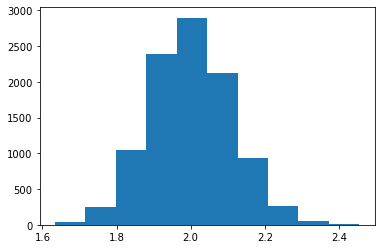

In [20]:
# Plot the simulated sampling distribution of the Benign cell - We see clearly the mean around 2 with a std around 0.4
plt.hist(sample_benign)

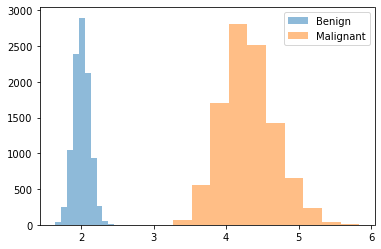

In [21]:
# We can see that there is a significant difference between Benign and Malignant
plt.hist(sample_benign, alpha=0.5, label='Benign')
plt.hist(sample_malignant, alpha=0.5, label='Malignant')
plt.legend(loc='upper right')
plt.show()

In [22]:
# The theorical mean and simulated mean is very close to each other
(benign.smoothness_mean.mean(), simulated_benign_mean)

(2.0003212885154062, 2.0001554664)

In [23]:
# The theorical mean and simulated mean is also very close to each other
(malignant.smoothness_mean.mean(), simulated_malignant_mean)

(4.303715639810426, 4.304460678)

## Exploratory Analysis

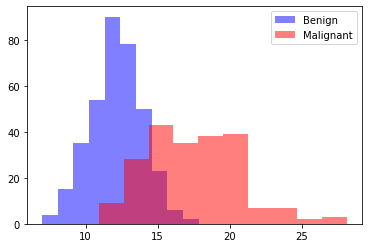

In [24]:
# Let see if there are other significant difference in other features of the data
plt.hist(benign.radius_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.radius_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

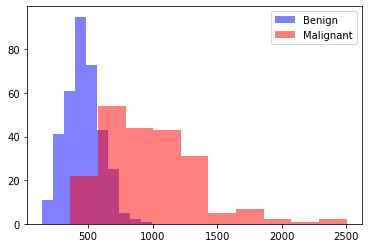

In [25]:
plt.hist(benign.texture_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.texture_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

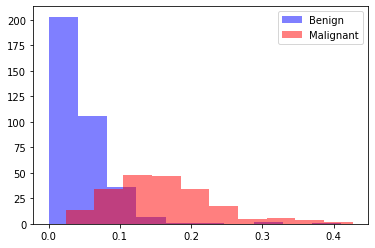

In [26]:
plt.hist(benign.perimeter_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.perimeter_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

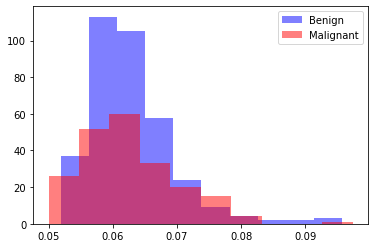

In [27]:
plt.hist(benign.area_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.area_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

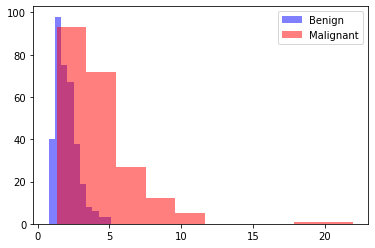

In [28]:
plt.hist(benign.smoothness_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.smoothness_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

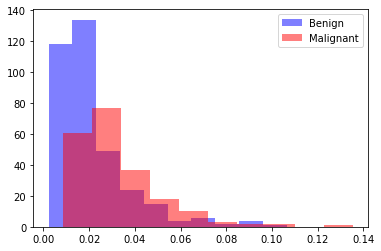

In [29]:
plt.hist(benign.compactness_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.compactness_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

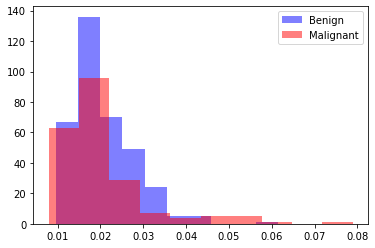

In [30]:
plt.hist(benign.concavity_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.concavity_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

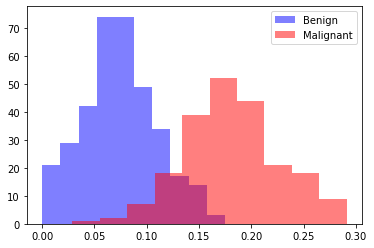

In [31]:
plt.hist(benign.fractal_dimension_mean, alpha=0.5, color="blue", label = "Benign")
plt.hist(malignant.fractal_dimension_mean, alpha=0.5, color="red", label = "Malignant")
plt.legend()

### Identify 2-3 variables that are predictive of a malignant tumor

In [32]:
# Transform categorical object into float
lb_make = LabelEncoder()
df['diagnosis_code'] = lb_make.fit_transform(df['diagnosis'])
df.diagnosis_code = df.diagnosis_code.astype(float)
df[["diagnosis","diagnosis_code"]].head()

,diagnosis,diagnosis_code
0,M,1.0
1,M,1.0
2,M,1.0
3,M,1.0
4,M,1.0


In [33]:
df_ready=df.iloc[:,2:33]

In [34]:
df_ready.head()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis_code
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1.0


In [35]:
df_ready.shape

(568, 31)

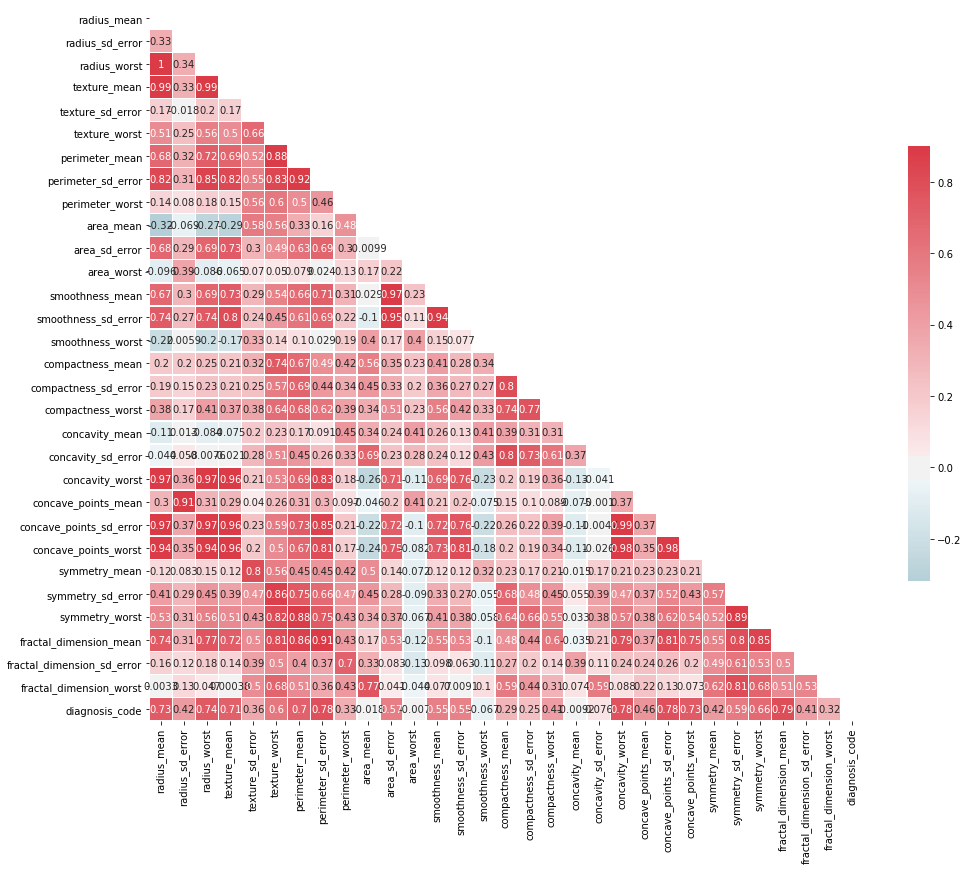

In [36]:
corr = df_ready.corr()


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.9, 
            center=0,
            annot=True,
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)

In [37]:
df_ready[df_ready.columns[:]].corr()['diagnosis_code'][0:30]

radius_mean                   0.729376
radius_sd_error               0.422146
radius_worst                  0.741887
texture_mean                  0.708389
texture_sd_error              0.356276
texture_worst                 0.595587
perimeter_mean                0.695648
perimeter_sd_error            0.776369
perimeter_worst               0.327336
area_mean                    -0.018099
area_sd_error                 0.565373
area_worst                   -0.007024
smoothness_mean               0.554416
smoothness_sd_error           0.546343
smoothness_worst             -0.066629
compactness_mean              0.290866
compactness_sd_error          0.252567
compactness_worst             0.407293
concavity_mean               -0.009170
concavity_sd_error            0.076068
concavity_worst               0.775725
concave_points_mean           0.461443
concave_points_sd_error       0.782470
concave_points_worst          0.732925
symmetry_mean                 0.419731
symmetry_sd_error        

## Modeling

### Build a model to predict the malignant tumors.

In [69]:
X = df_ready.drop(labels = ['diagnosis_code'], axis=1)
Y = df_ready["diagnosis_code"]
cols = list(X.columns)
print(X.shape)
print(Y.shape)

(568, 30)
(568,)


In [60]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
feature_Scores = pd.concat([df_columns,df_scores],axis=1)
feature_Scores.columns = ['Specs','Score']  #naming the dataframe columns
print(feature_Scores.nlargest(10,'Score'))  #print 10 best features

                      Specs          Score
23     concave_points_worst  111784.794951
3              texture_mean   53859.312568
13      smoothness_sd_error    8646.030808
22  concave_points_sd_error    3631.288627
2              radius_worst    2002.534881
20          concavity_worst     488.172350
0               radius_mean     265.194333
12          smoothness_mean     246.367387
21      concave_points_mean     177.253229
1           radius_sd_error      96.259611


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, shuffle=True)

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Logistic Regression

In [41]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
print('Accuracy of LR classifier on training set: {:.2f}'.format(LR.score(X_train, Y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'.format(LR.score(X_test, Y_test)))
Y_pred=LR.predict(X_test)
print('MAE of LR classifier on test set: {:.2f}'.format(mean_absolute_error(Y_test, Y_pred)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy of LR classifier on training set: 0.99
Accuracy of LR classifier on test set: 0.96
MAE of LR classifier on test set: 0.04
[[67  1]
 [ 3 43]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        68
         1.0       0.98      0.93      0.96        46

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [70]:
#Initializing RFE model
rfe = RFE(LR, 10)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)            
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[ True False False False False False False False False False  True False
 False  True False False False False False False  True  True  True  True
  True False  True  True False False]
[ 1 10  9  5 17 16  8  3 19  2  1 14  6  1 12  7 20 15 11 13  1  1  1  1
  1 21  1  1  4 18]
Index(['radius_mean', 'area_sd_error', 'smoothness_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_worst',
       'fractal_dimension_mean'],
      dtype='object')


In [63]:
print(LR.coef_)

[[ 0.6614947   0.45364589  0.61803061  0.62521571  0.20856896 -0.30271546
   0.70645012  0.78661459  0.18663082 -0.54893472  1.07002843 -0.32624526
   0.63185071  0.9384662   0.36131169 -0.71474797  0.0590984   0.25675294
  -0.49406066 -0.51304398  0.94223052  1.50985337  0.76467447  0.89622693
   0.8852356  -0.01928226  1.05208361  0.79862057  0.90325997  0.20232568]]


#### DecisionTreeClassifier 

In [51]:
DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [54]:
print('Accuracy of DT classifier on training set: {:.2f}'.format(DT.score(X_train, Y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'.format(DT.score(X_test, Y_test)))
Y_pred=DT.predict(X_test)
print('MAE of DT classifier on test set: {:.2f}'.format(mean_absolute_error(Y_test, Y_pred)))
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 0.91
MAE of DT classifier on test set: 0.09
[[63  5]
 [ 5 41]]
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        68
         1.0       0.89      0.89      0.89        46

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [72]:
#Initializing RFE model
rfe = RFE(DT, 10)
rfe = rfe.fit(X_train, Y_train)
print(rfe.support_)
print(rfe.ranking_)            
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[False False False False  True False False False False False False False
 False False False False False False False  True False  True  True  True
  True  True  True  True  True False]
[21 19 18 17  1 10  7  9  6  5  3  2  4 11 13 20 15 16 14  1  8  1  1  1
  1  1  1  1  1 12]
Index(['texture_sd_error', 'concavity_sd_error', 'concave_points_mean',
       'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean',
       'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error'],
      dtype='object')


## Explanation

### To Technical Audiences

### To Non-Technical Audiences

# DSI Instructor Task: Part 2

## Sample Student Submissions

### Code

### Methodology

### Conceptual Understanding

#### Student Sample 1

In [274]:
#!/usr/bin/env python

import pandas as pd
# import numpy as np
# you currently don't need numpy package
# from sklearn import LinearRegression 
# cannot import 'Linear Regression' from sklearn try from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import cross_val_score 
# there is no module 'sklearn.cross_validation' try from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

# Load data
# d = pd.read_csv('../data/train.csv') 
# there was two dots ('../'), try with one ('./'), 
# also remane 'd' to 'data' for consistency with the rest of your code
data = pd.read_csv('./data/train.csv')

# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType) #Convert categorical variable into dummy/indicator variables.
# what is your target data? 'x1' or 'x2', to avoid confusion, it is best to use 'y' and 'x'

# Setup model
model = LinearRegression()

# Evaluate model
# from sklearn.cross_validation import cross_val_score 
# you had the same line above, just one is enough
# from sklearn.cross_validation import train_test_split 
# you are not using 'train_test_split' at the moment
# although if you wish to import this package you should try: from sklearn.model_selection import train_test_split

# scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error') 
# cv should have a value higher than 1, especially if you are calculating a mean later
# the selected scoring method 'mean_absolute_error' is invalid, you do not need this evaluation
scores = cross_val_score(model, x2, x1, cv=5)
print(scores) # you might want to see the 'scores values' before the mean
print(scores.mean())

[ 0.02274323 -0.02324406 -0.21940818 -0.03234682 -0.0590898 ]
-0.06226912580167134


#### Student Sample 2

In [277]:
#!/usr/bin/env python

import pandas as pd
# import numpy as np
# you currently don't need numpy package
from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import cross_val_score 
# there is no module 'sklearn.cross_validation' try from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score

# Load data
# data = pd.read_csv('../data/train.csv')
# there was two dots ('../'), try with one ('./'), 
data = pd.read_csv('./data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType) #Convert categorical variable into dummy/indicator variables.


# Setup model
model = LinearRegression()

# Evaluate model
# scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
# the selected scoring method 'mean_absolute_error' is invalid, what are you trying to do here?
scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())

-0.06226912580167134
